In [113]:
from time import time
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz


Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


# 建立模型

In [81]:
def layer(output_dim, input_dim, inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    XWb = tf.matmul(inputs, W) + b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs

## 建立輸入層 X

In [82]:
X = tf.placeholder('float', [None, 28*28])

## 建立隱藏層

In [83]:
h = layer(256, 28*28, X, tf.nn.relu)

## 建立輸出層

In [84]:
y_predict = layer(output_dim=10, input_dim=256, inputs=h, activation=None)

# 定義訓練方式

## 建立訓練資料label真實值 placeholder

In [85]:
y_label = tf.placeholder('float', [None, 10])

## 定義loss function

In [86]:
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predict, labels=y_label))

## 選擇optimizer

In [87]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss_function)

# 定義評估模型的準確率

## 計算每一筆資料是否正確預測

In [88]:
correct_prediction = tf.equal(tf.argmax(y_label, 1), tf.argmax(y_predict, 1))

## 將計算預測正確結果，加總平均

In [89]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# 開始訓練

In [90]:
trainEpochs = 15
batchSize = 100
totalBatchs = int(mnist.train.num_examples / batchSize)
epoch_list = []
loss_list = []
accuracy_list = []

In [91]:
startTime = time()
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(trainEpochs):
    for i in range(totalBatchs):
        batch_x, batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer, feed_dict={X: batch_x, y_label: batch_y})

    loss, acc = sess.run([loss_function, accuracy],
                         feed_dict={X: mnist.validation.images, y_label: mnist.validation.labels})
    epoch_list.append(epoch)
    loss_list.append(loss)
    accuracy_list.append(acc)
    print("Train Epoch:", '%02d' % (epoch + 1), "Loss=", "{:.9f}".format(loss), " Accuracy=", acc)

duration = time() - startTime
print("Train Finished takes:", duration)

Train Epoch: 01 Loss= 6.328281879  Accuracy= 0.8476


Train Epoch: 02 Loss= 4.251550198  Accuracy= 0.8872


Train Epoch: 03 Loss= 3.275358200  Accuracy= 0.9026


Train Epoch: 04 Loss= 2.678857088  Accuracy= 0.9186


Train Epoch: 05 Loss= 2.331527472  Accuracy= 0.9222


Train Epoch: 06 Loss= 2.057897806  Accuracy= 0.9254


Train Epoch: 07 Loss= 1.843334675  Accuracy= 0.932


Train Epoch: 08 Loss= 1.724690318  Accuracy= 0.9326


Train Epoch: 09 Loss= 1.591465354  Accuracy= 0.9376


Train Epoch: 10 Loss= 1.573516726  Accuracy= 0.9358


Train Epoch: 11 Loss= 1.485794783  Accuracy= 0.9378


Train Epoch: 12 Loss= 1.423064232  Accuracy= 0.9392


Train Epoch: 13 Loss= 1.387242675  Accuracy= 0.9408


Train Epoch: 14 Loss= 1.365172863  Accuracy= 0.9388


Train Epoch: 15 Loss= 1.330969691  Accuracy= 0.9428
Train Finished takes: 29.196024417877197


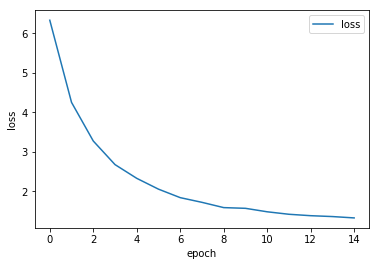

In [92]:
plt.plot(epoch_list, loss_list, label='loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

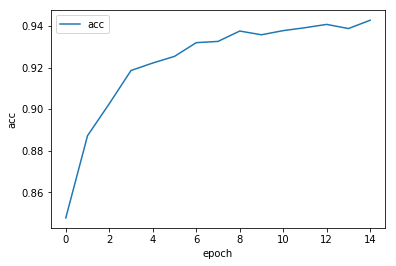

In [93]:
plt.plot(epoch_list, accuracy_list)
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['acc'])

# 評估模型準確率

In [95]:
print("Accuracy:", sess.run(accuracy,
                           feed_dict={X: mnist.test.images,
                                      y_label: mnist.test.labels}))

Accuracy: 0.9417


# 進行預測

In [102]:
prediction = sess.run(tf.argmax(y_predict, axis=1), feed_dict={X: mnist.test.images})
test_y = sess.run(tf.argmax(y_label, axis=1), feed_dict={y_label: mnist.test.labels})

In [103]:
print(prediction)
print(test_y)

[7 2 1 ..., 4 5 6]
[7 2 1 ..., 4 5 6]


In [112]:
df = pd.DataFrame({'label': test_y, 'predict': prediction})
index = df[df.label != df.predict].index
for i in index[:10]:
    print('真實值為', df.label[i], '  預測值為', df.predict[i])

真實值為 9   預測值為值為 1
真實值為 4   預測值為值為 6
真實值為 9   預測值為值為 7
真實值為 3   預測值為值為 2
真實值為 7   預測值為值為 3
真實值為 9   預測值為值為 8
真實值為 9   預測值為值為 4
真實值為 3   預測值為值為 5
真實值為 9   預測值為值為 8
真實值為 4   預測值為值為 2


In [125]:
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: 
        num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1 + i)

        ax.imshow(np.reshape(images[idx], (28, 28)),
                  cmap='binary')

        title = "label=" + str(labels[idx])
        if len(prediction) > 0:
            title += ",predict=" + str(prediction[idx])

        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

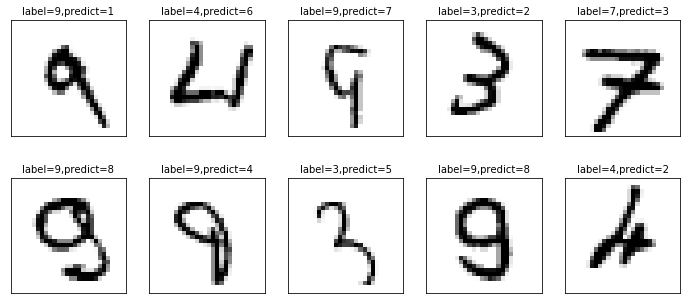

In [126]:
plot_images_labels_prediction(mnist.test.images[index], test_y[index], prediction[index], 0)

In [127]:
sess.close()